## DATA SCIENCE PROJECT(GROUP 39) - Classifying a Country's Status ##

## Introduction ## 
A country's status can be defined or classified as either developed or developing. This is determined by factors including life expectancy, percentage of spending, GDP, schooling income composition of resources, and percentage of thinness. These specfically mentioned factors will be used in our analysis and code. The WHO data repository on the Life expectancy of various countries from 2000 to 2015 provides the data for our project. The goal of this research project is to select the best predictor variable from the available factors in order to utilize a classification model to forecast the status of countries. The model's accuracy will then be evaluated by contrasting its output with the original data.


## Libraries and Setting Seed ##

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
set.seed(1000)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Reading into R and Tidying ##

In [2]:
url<-"https://raw.githubusercontent.com/Ansh-Sharma2/DataSciProject1/main/LifeExpectancyData%20(1).csv"
life_expectancy_data<-read_csv(url)#reading in the raw dataset

life_expectancy_data<-life_expectancy_data |>#changes the status variable to a factor datatype
mutate(Status=as_factor(Status))

intial_nrows<-nrow(life_expectancy_data)#count the number of rows initially in the dataset

life_expectancy_data<-na.omit(life_expectancy_data)#removes all observation that have missing values in any of its cell

final_nrows<-nrow(life_expectancy_data)#count the number of rows after the removing observations with missing values 

colnames(life_expectancy_data) <- make.names(colnames(life_expectancy_data))#removes the spaces from the varibale names

life_expectancy_data<-rename(life_expectancy_data,thinness.10.to.19.years=thinness..1.19.years
                             ,thinness.5.to.9.years=thinness.5.9.years)#renaming variables that were labelled incorrectly
head(life_expectancy_data,6)#output the first 6 observations in the dataset

life_expectancy_data<-mutate(life_expectancy_data,thinness.5.to.19.years=thinness.10.to.19.years+thinness.5.to.9.years)#calculate the prevelance of thinness between the ages of 5 and 19

life_expectancy_data<-select(life_expectancy_data,Country, Status, GDP, Life.expectancy, Schooling, percentage.expenditure, 
                             Income.composition.of.resources,thinness.5.to.19.years)#selection of useful variable


Rows: 2938 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness.10.to.19.years,thinness.5.to.9.years,Income.composition.of.resources,Schooling
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


## Summary Tables ##

In [3]:

life_expectancy_split <- initial_split(life_expectancy_data,prop=0.75,strata=Status) 
    life_expectancy_train<-training(life_expectancy_split)
    life_expectancy_test<-testing(life_expectancy_split)

# We choose 75/ 25 split becuase we wanted an adequate size training set to operate on while also have a good proportion to 
# to test on get a accurate measure of the accuracy of the model

num_rows_deleted<-intial_nrows-final_nrows#calulate the number of rows removed
print("Number Of Rows Deleted")
num_rows_deleted

status_count_train<-life_expectancy_train|>#outputs the count of the number of instances for developed and developing countries
    group_by(Status)|>
    summarize(count=n())
status_count_train

mean_variables_train<-life_expectancy_train|>#finding the average of some of the relevent predictors
    group_by(Country)|>
    summarize(avg_life_exp=mean(Life.expectancy),avg_GDP=mean(GDP),avg_percent_exp=mean(percentage.expenditure),avg_schooling_years=mean(Schooling),
              avg_income_comp=mean(Income.composition.of.resources),avg_thinness=mean(thinness.5.to.19.years))|>
    head(6) #first 6 countries are displayed
mean_variables_train


[1] "Number Of Rows Deleted"


[1] 1289

Status,count
<fct>,<int>
Developing,1055
Developed,181


Country,avg_life_exp,avg_GDP,avg_percent_exp,avg_schooling_years,avg_income_comp,avg_thinness
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,57.67500,333.7495,32.68551,8.008333,0.4091667,33.608333
Albania,74.73636,1796.3760,159.99016,11.754545,0.7023636,3.418182
Algeria,74.43750,3926.5778,367.12891,13.487500,0.7140000,11.862500
Angola,51.48000,3250.8142,184.91124,9.720000,0.4996000,17.700000
Argentina,75.20000,7069.0828,883.74452,16.650000,0.7960000,1.990000
Armenia,73.33333,2084.4008,148.85372,11.822222,0.7014444,4.133333


## Graphs and Visualizations ##

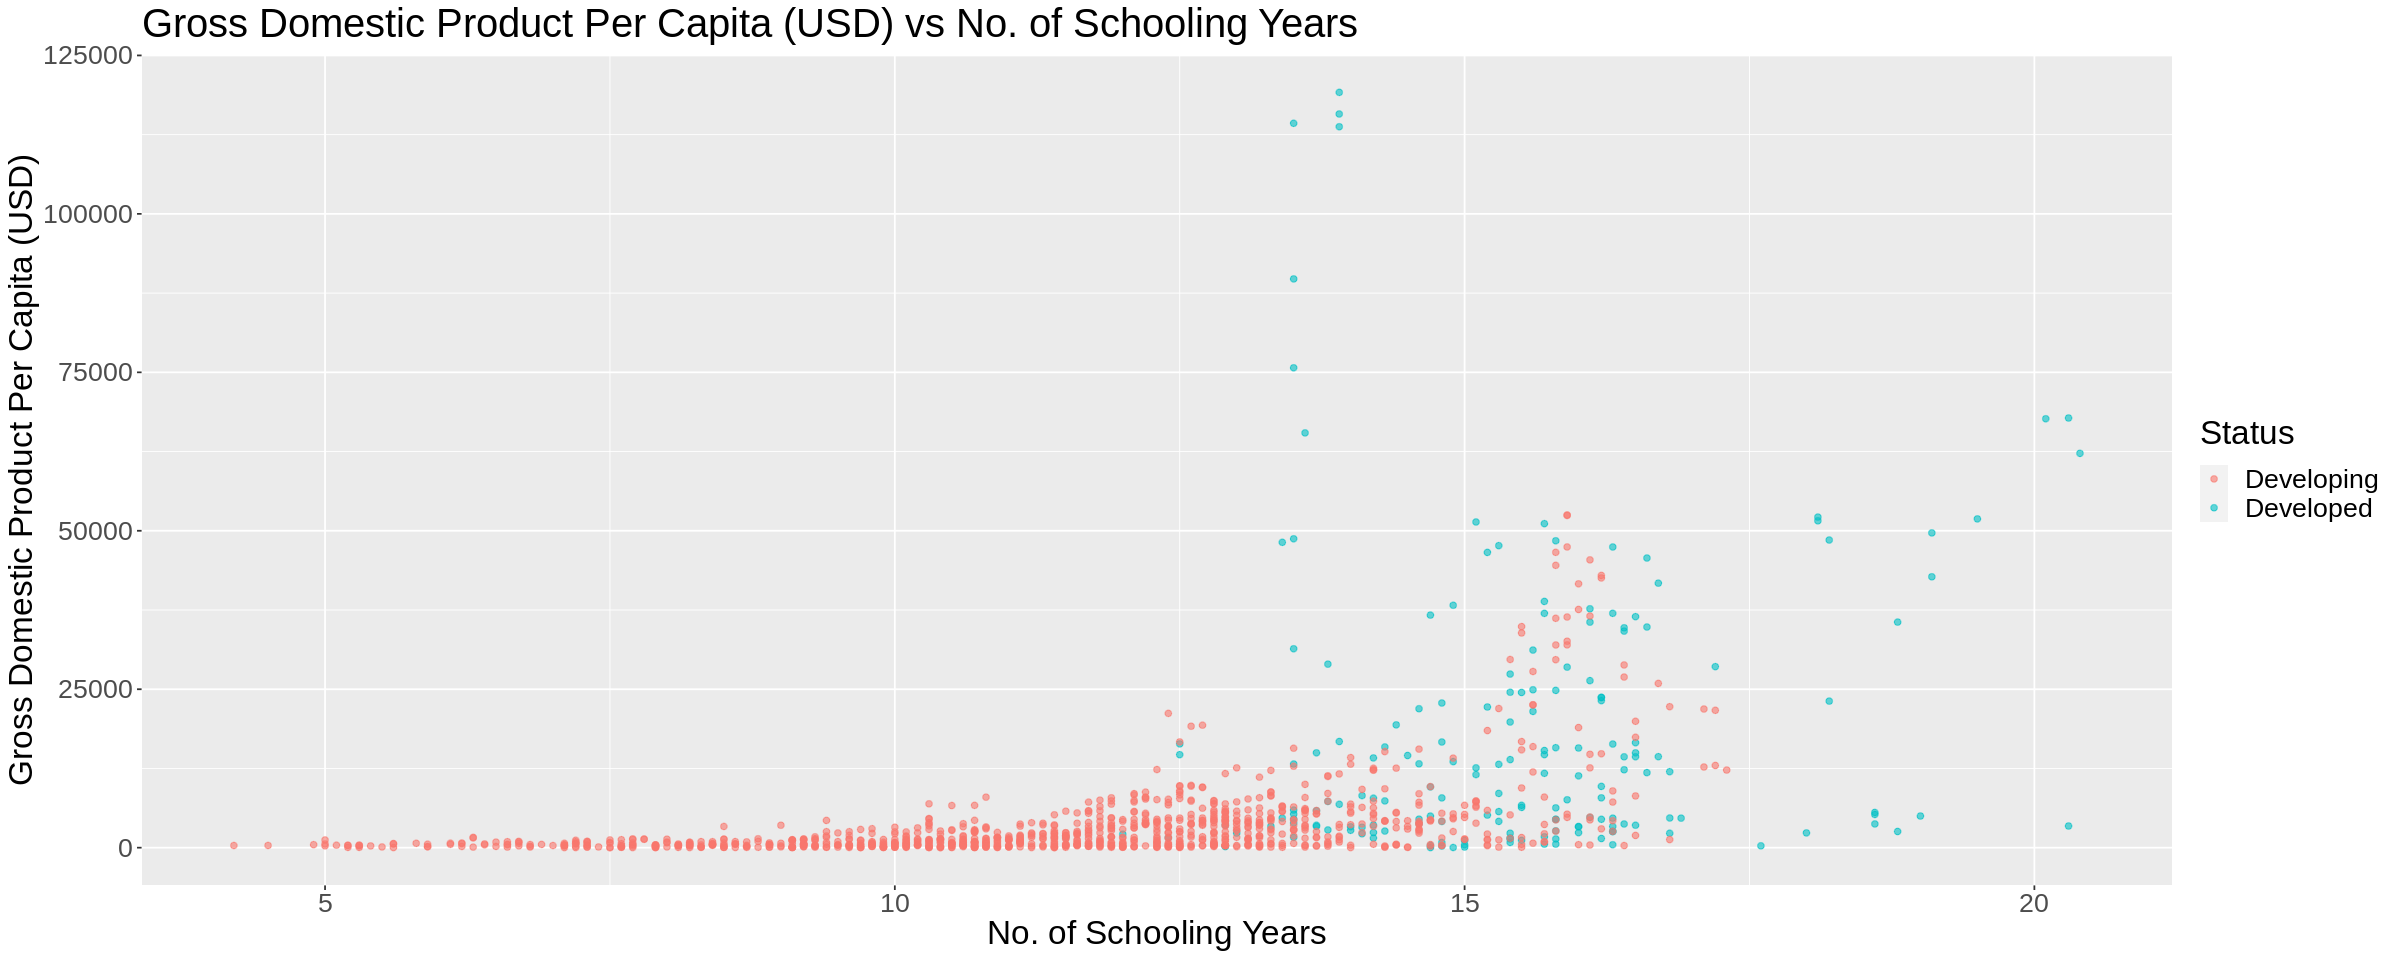

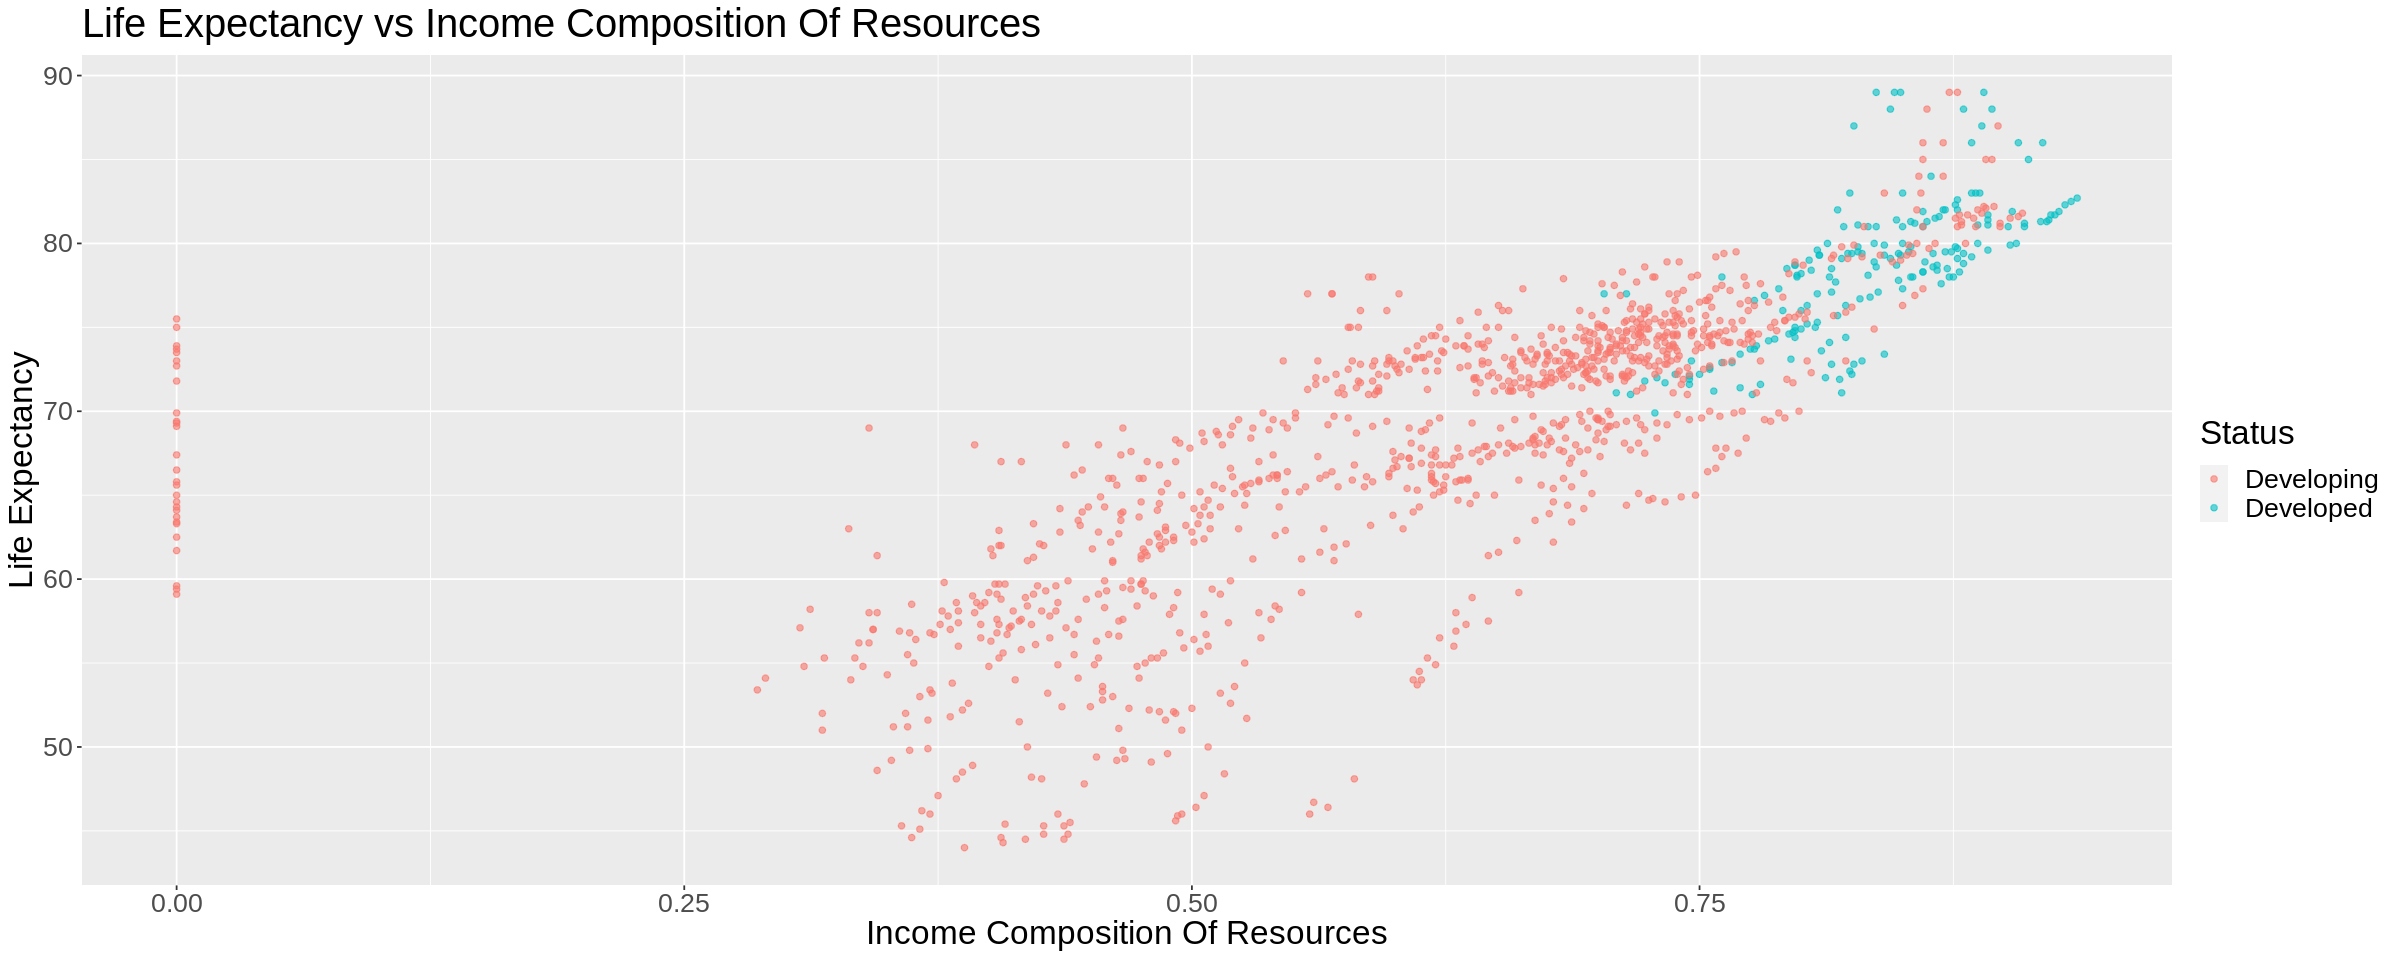

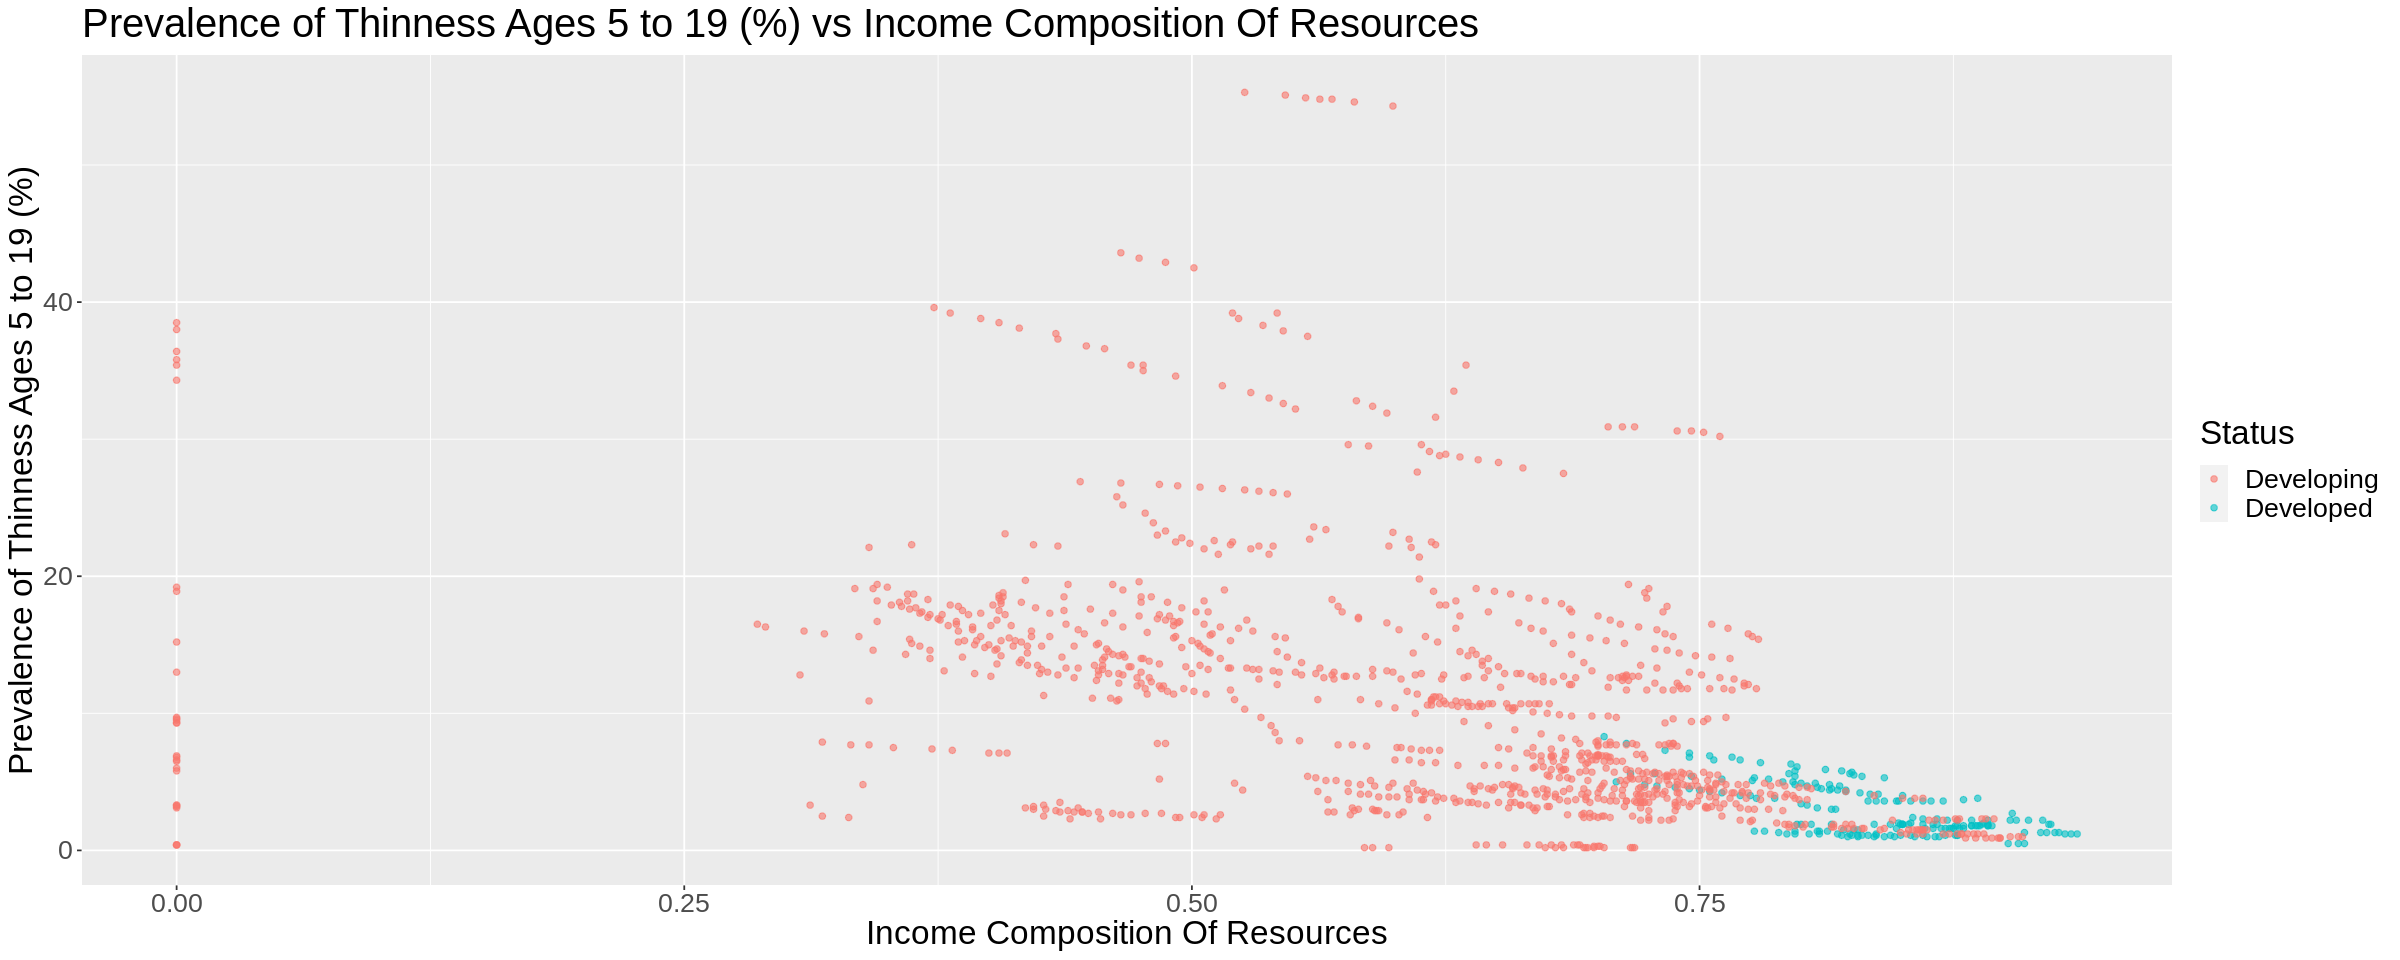

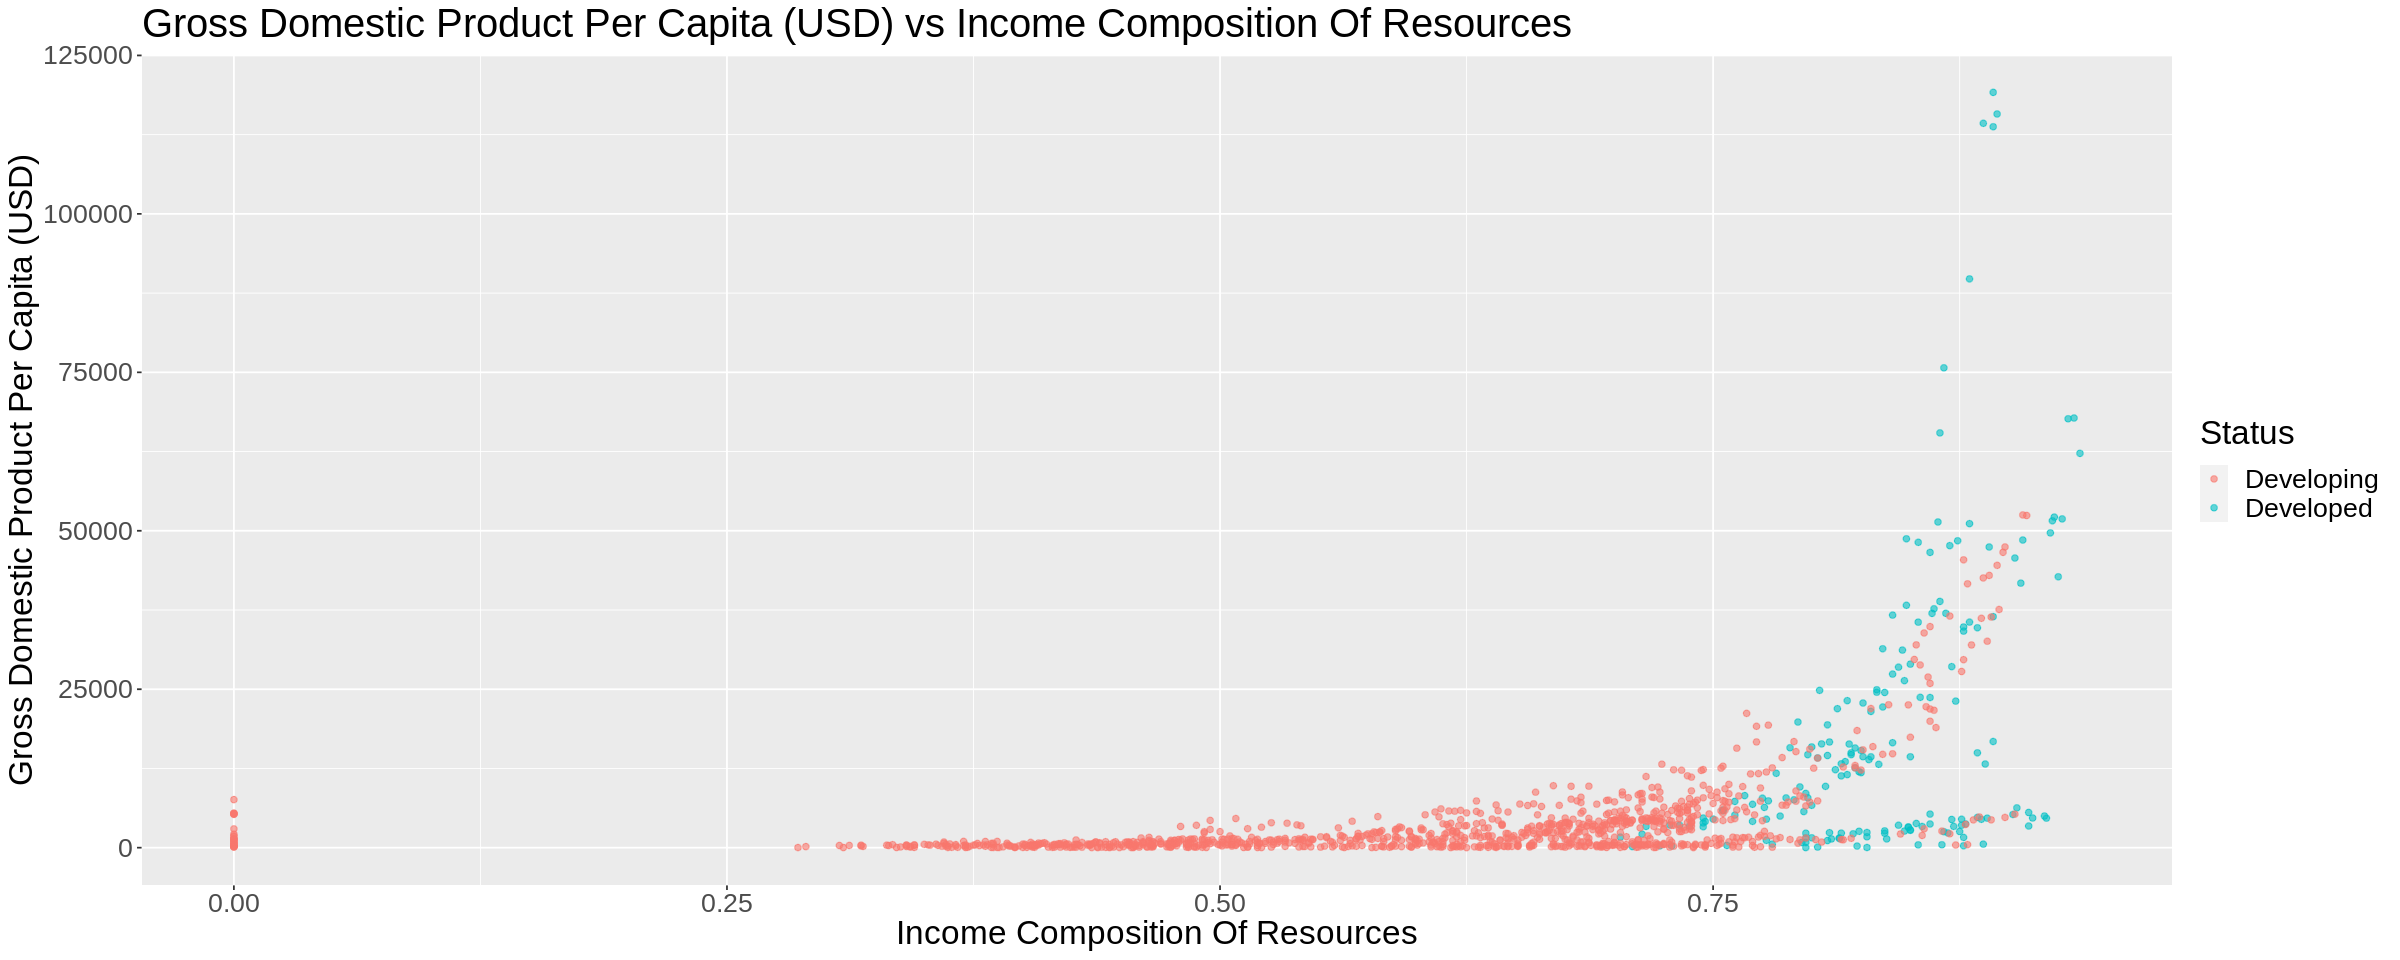

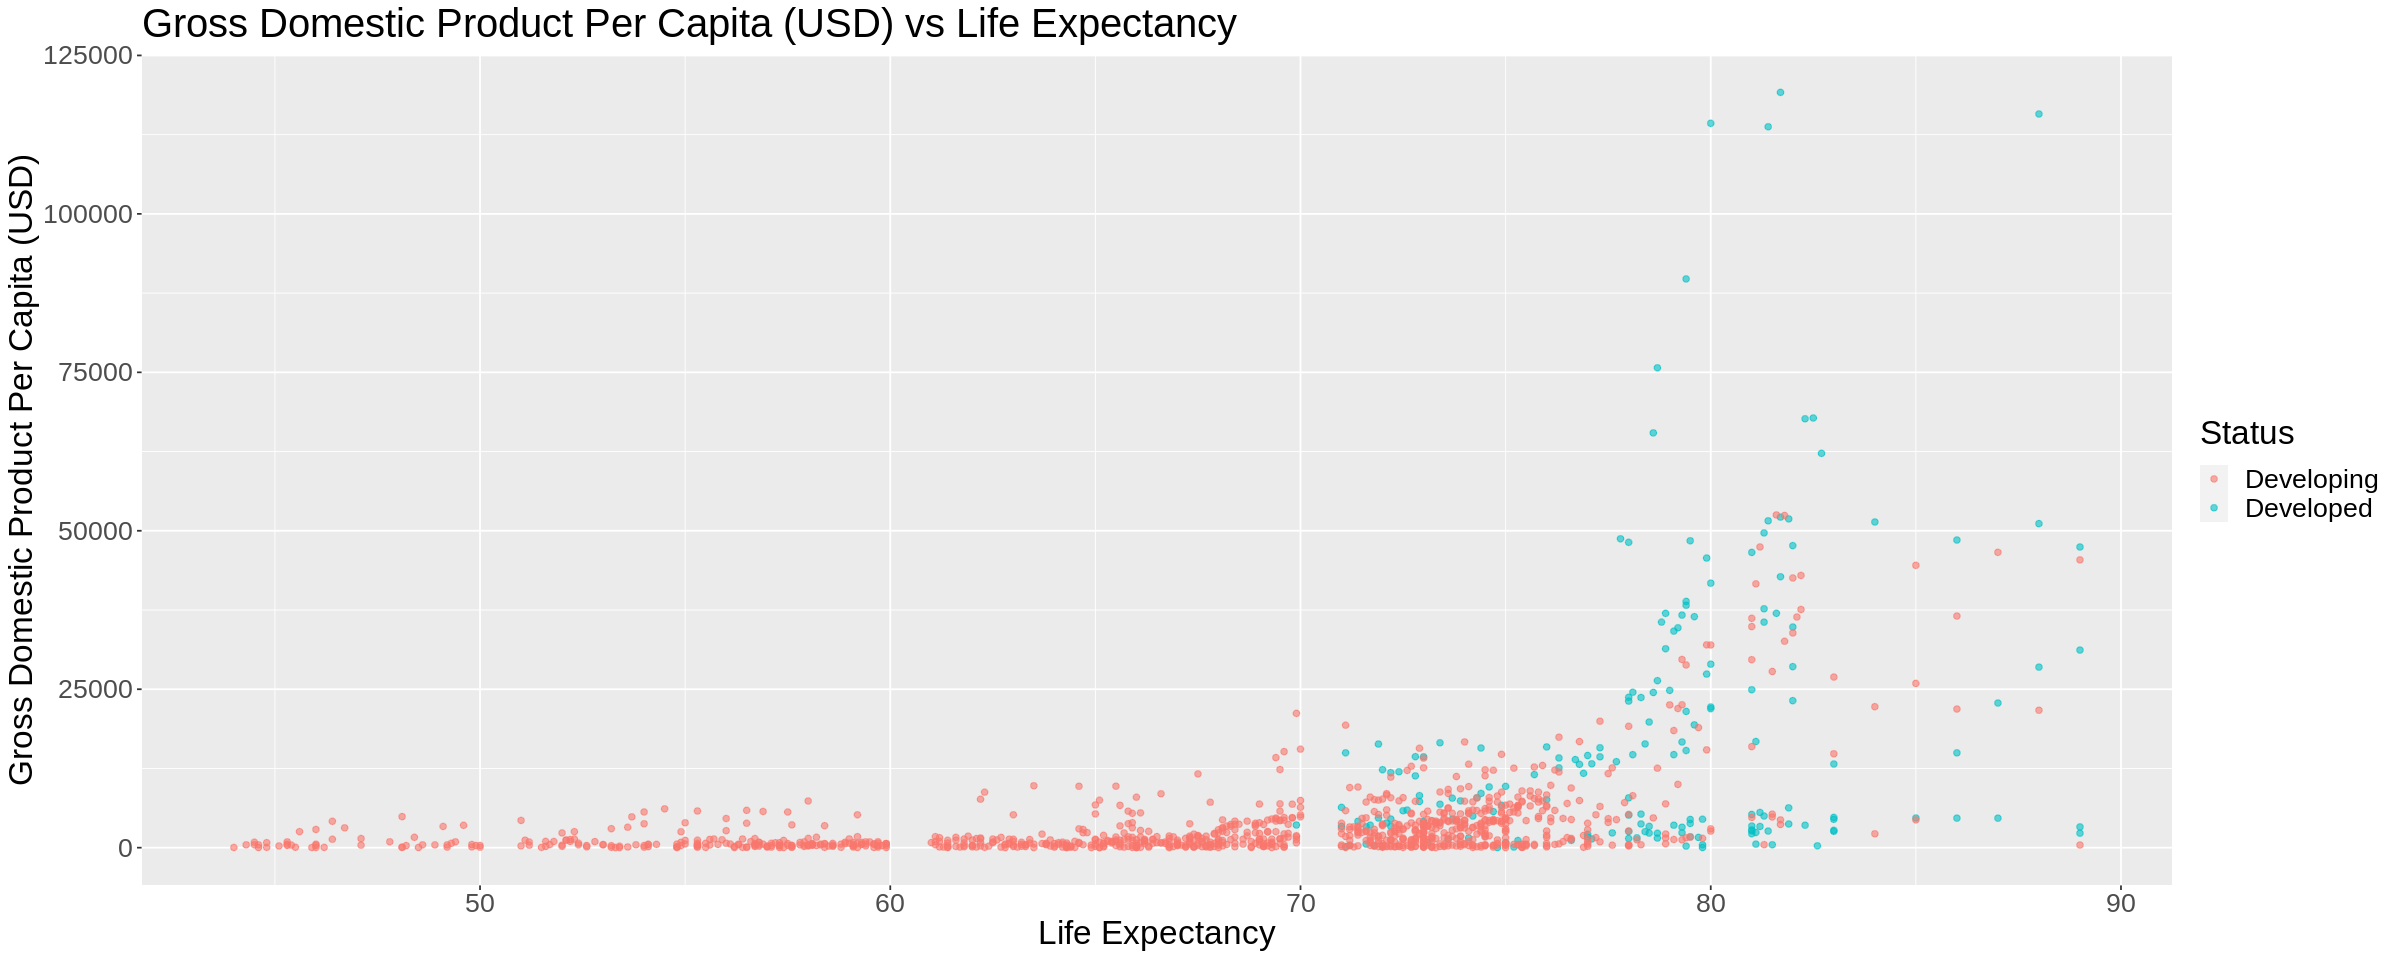

In [4]:
options(repr.plot.width = 20, repr.plot.height = 8)

Schooling_vs_GDP<-life_expectancy_train|>#relationship between schooling years and GDP
    ggplot(aes(x=Schooling,y=GDP,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("No. of Schooling Years")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    ggtitle("Gross Domestic Product Per Capita (USD) vs No. of Schooling Years")+
    theme(text = element_text(size = 20))  
Schooling_vs_GDP

Life_exp_vs_income_comp<-life_expectancy_train|>#relationship between Life Expectancy and Income Composition of Resources
    ggplot(aes(x=Income.composition.of.resources,y=Life.expectancy,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Income Composition Of Resources")+
    ylab("Life Expectancy")+
    ggtitle("Life Expectancy vs Income Composition Of Resources")+
    theme(text = element_text(size = 20))  
Life_exp_vs_income_comp

thinness_vs_income_comp<-life_expectancy_train|>#relationship between Thinness in children ages 5 to 19 and Income Composition of Resources
    ggplot(aes(x=Income.composition.of.resources,y=thinness.5.to.19.years,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Income Composition Of Resources")+
    ylab("Prevalence of Thinness Ages 5 to 19 (%)")+
    ggtitle("Prevalence of Thinness Ages 5 to 19 (%) vs Income Composition Of Resources")+
    theme(text = element_text(size = 20))  
thinness_vs_income_comp

GDP_vs_income_comp<-life_expectancy_train|>#relationship between GDP and Income Composition of Resources
    ggplot(aes(x=Income.composition.of.resources,y=GDP,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Income Composition Of Resources")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    ggtitle("Gross Domestic Product Per Capita (USD) vs Income Composition Of Resources")+
    theme(text = element_text(size = 20))  
GDP_vs_income_comp

GDP_vs_Life<-life_expectancy_train|>#relationship between GDP and Life Expectancy
    ggplot(aes(x=Life.expectancy,y=GDP,colour=Status))+
    geom_point(alpha=0.6)+
    xlab("Life Expectancy")+
    ylab("Gross Domestic Product Per Capita (USD)")+
    ggtitle("Gross Domestic Product Per Capita (USD) vs Life Expectancy")+
    theme(text = element_text(size = 20))  
GDP_vs_Life



## Methods: ## 

The data analysis will be done through a varying process of graphs, from which we can infer the trends we hope to see. We are using 6 variables: life expectancy, percentage expenditure, GDP, schooling, income composition of resources and, percentage thinness, to predict the status of the country. These variables were chosen based on information from the internet and the use of graphical displays we created within R. More developed countries often have more resources to invest in health care and will increase the Life expectancy. We chose percentage expenditure as a variable as well, because it is the percentage of GDP dedicated towards income. Another good indicator for the status is the GDP per capita for the country; therefore, we must take population into account. The status can also be predicted by the quality of the schooling system and how much education is pushed. We define this by the average number of years of education for people in that country. Financial stability is often connected to a more developed country, so we used income composition of resources. This is the relative share of income divided by the total income of the area. Finally, we considered the overall health care and the percentage of thinness, which gauges the prevalence of thinness in the country (the percentage of people with a very low BMI). These variables showed correlation with the status of the country and thus will be adequate predictors. The results will be represented in a scatterplot of the predicted statuses of the countries with each of the predictor variables.

## Expected outcomes and significance: ##

From this data set, we intend to find whether or not a country can be classified as a developing country or a developed country. From our analyses, we hope to find a few of the major and minor factors in determining the status of a country(eg. Life Expectancy, income, etc.). We expect that some of the major determining factors include life expectancy, adult mortality, infant deaths, and GDP. With these findings, we hope to learn about what forms the pillars of a society, what makes a country strong, and what can make it fall apart. This study could also lead us to exploring the question of what must be done within a country for it to sustain itself.

